### Summery
<pre>
Author           : Anjana Tiha
Project Name     : Detection of Pneumonia from Chest X-Ray Images using Convolutional Neural Network, 
                   and Transfer Learning.
Description      : 1. Detected Pneumonia from Chest X-Ray images by retraining pretrained model “InceptionV3” 
                      with 5856 images of X-ray (1.15GB).
                   2. For retraining removed output layers, freezed first few layers and Fine-tuned model for 
                      two new label classes (Pneumonia and Normal).
                   3. Attained testing accuracy 83.44% and loss 0.42.
Method           : 
Tools/Library    : Python, Keras, PyTorch, TensorFlow
Version History  : 1.0.0.0
Current Version  : 1.0.0.0
Last Update      : 11.30.2018
Comments         : Please use Anaconda editor for convenience of visualization.
</pre>

#### Code
<pre>
GitHub Link      : <a href=https://github.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitHub)</a>
GitLab Link      : <a href=https://gitlab.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitLab)</a>
Portfolio        : <a href=https://anjanatiha.wixsite.com/website>Anjana Tiha's Portfolio</a>
</pre>

#### Dataset
<pre>
Dataset Name     : Chest X-Ray Images (Pneumonia)
Dataset Link     : <a href=https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia>Chest X-Ray Images (Pneumonia) Dataset (Kaggle)</a>
                 : <a href=https://data.mendeley.com/datasets/rscbjbr9sj/2>Chest X-Ray Images (Pneumonia) Dataset (Original Dataset)</a>
Original Paper   : <a href=https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5>Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning</a>
                   (Daniel S. Kermany, Michael Goldbaum, Wenjia Cai, M. Anthony Lewis, Huimin Xia, Kang Zhang)
                   https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
</pre>

#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0

#### Commands / Running Instruction
<pre>
tensorboard --logdir=logs
%config IPCompleter.greedy=True
</pre>

<pre>
<b>Dataset Details</b>
Dataset Name            : Chest X-Ray Images (Pneumonia)
Number of Class         : 2
Number/Size of Images   : Total      : 5856 (1.15 Gigabyte (GB))
                          Training   : 5216 (1.07 Gigabyte (GB))
                          Validation : 320  (42.8 Megabyte (MB))
                          Testing    : 320  (35.4 Megabyte (MB))

<b>Model Parameters</b>
Machine Learning Library: Keras
Base Model              : InceptionV3
Optimizers              : Adam
Loss Function           : categorical_crossentropy

<b>Training Parameters</b>
Batch Size              : 64
Number of Epochs        : 50
Training Time           : 3 Hours

<b>Output (Prediction/ Recognition / Classification Metrics)</b>
<!--<b>Validation</b>-->
<b>Testing</b>
Accuracy                : 83.44%
Loss                    : 0.42
<!--Precision               : -->
Recall                  : 94% (highest)
<!--Specificity             : -->
</pre>

## Import Libraries

In [ ]:
from __future__ import print_function

import argparse
import sys
import os

import random

import time
import datetime

from collections import Counter
import numpy as np

import shutil
import inspect

import gc

import re

import keras
from keras import models
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras import optimizers

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

from keras import backend as K

import tensorflow as tf

from IPython.display import display
from PIL import Image

import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix



C:\Users\Andromeda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Functions

### File Function

In [ ]:
# Creates directory, if directory exists removes if remove parameter is set to True 
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

# Removes directory, if directory exists 
def remove_directory(directory_path):
    if os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
        
    return True

# Deletes file, if file exists 
def remove_file(filename):
    if os.path.exists(filename):
        try:
            os.remove(filename)
        except:
            print("Could not remove file : ", filename)
            return False
        
    return True



### Time Function

In [ ]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))
    if x==2:    
        print('Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now()))
    if x==3:  
        print('Date now: %s' % datetime.datetime.now())
    if x==4:  
        print('Date today: %s' % datetime.date.today())  

### Debug Functions

In [ ]:
# prints a integer for degugging
def debug(x):
    print("-"*40, x, "-"*40)  

### String Function

In [ ]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

### Data Visualization Function

In [ ]:
# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        file_count = len(os.listdir(current_directory))
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    
def reset_plot_propert(plot_property=None):
    plot_property = {
        'figsize':(15, 5),
        'title':'title',
        'xlabel': None,
        'ylabel': None,
        'legend': None,
        'title_fontsize' : 18,
        'label_fontsize':14, 
        'subplot':None}
    return plot_property

# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
    sns.barplot(x=x, y=y)
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    plt.xticks(range(len(x)), x)
    
# show bar plot for count of labels in subdirectory of a directory
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    x=dir_name
    y=dir_file_count
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = title +" (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
    
    plot_property['title'] = title +" (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title +" (Testing)"
    plot_property['subplot'] = subplot_no+2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

### Image Preprocessing Function

In [43]:
# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches)
def get_transformed_image_batch(directory, image_transform_params, batch_params):       
    if x==1:
        datagen = ImageDataGenerator(
            featurewise_center = image_transform_params['featurewise_center'], 
            samplewise_center = image_transform_params['samplewise_center'], 
            featurewise_std_normalization = image_transform_params['featurewise_std_normalization'],
            samplewise_std_normalization = image_transform_params['samplewise_std_normalization'], 
            zca_whitening = image_transform_params['zca_whitening'], 
            zca_epsilon = image_transform_params['zca_epsilon'], 
            rotation_range = image_transform_params['rotation_range'], 
            width_shift_range = image_transform_params['width_shift_range'], 
            height_shift_range = image_transform_params['height_shift_range'], 
            brightness_range = image_transform_params['brightness_range'], 
            shear_range = image_transform_params['shear_range'], 
            zoom_range = image_transform_params['zoom_range'], 
            channel_shift_range = image_transform_params['channel_shift_range'], 
            fill_mode = image_transform_params['fill_mode'], 
            cval = image_transform_params['cval'], 
            horizontal_flip = image_transform_params['horizontal_flip'], 
            vertical_flip = image_transform_params['vertical_flip'], 
            rescale = image_transform_params['rescale'], 
            preprocessing_function = image_transform_params['preprocessing_function'], 
            data_format = image_transform_params['data_format'],
            validation_split = image_transform_params['validation_split'], 
            dtype = image_transform_params['dtype'])     
    
    else:
        datagen = ImageDataGenerator(
            shear_range = image_transform_params['shear_range'], 
            zoom_range = image_transform_params['zoom_range'], 
            horizontal_flip = image_transform_params['horizontal_flip'], 
            rescale = image_transform_params['rescale'])  
    
    if x==1:
        image_generator = datagen.flow_from_directory(
            directory,
            target_size=batch_params['target_size'],
            color_mode=batch_params['color_mode'],
            classes = batch_params['classes'],
            class_mode=batch_params['class_mode'],
            batch_size=batch_params['batch_size'],
            shuffle=batch_params['shuffle'],
            seed=batch_params['seed'],
            save_to_dir=batch_params['save_to_dir'], 
            save_prefix=batch_params['save_prefix'],
            save_format=batch_params['save_format'],
            follow_links=batch_params['follow_links'], 
            subset=batch_params['subset'],
            interpolation=batch_params['interpolation'])
        
    else:
        image_generator = datagen.flow_from_directory(
            directory,
            target_size=batch_params['target_size'],
            classes = batch_params['classes'],
            class_mode=batch_params['class_mode'],
            batch_size=batch_params['batch_size'],
            shuffle=batch_params['shuffle'])
    
    return image_generator

### Data Label Preprocessing Function

In [44]:
# adjust class weights for imbalanced dataset of classes of images
def get_class_weight(y):
    counter = Counter(y)                          
    max_val = float(max(counter.values()))     
    class_weight = {class_id : max_val/num_images for class_id, num_images in counter.items()}   
    return class_weight

### Tensorflow Graph Function

In [45]:
# reset tensorflow graph tp free up memory and resource allocation 
def reset_graph(model=None):
    try:
        del model
    except:
        return False
    
    tf.reset_default_graph()
    
    K.clear_session()
    
    gc.collect()
    
    return True


# reset callbacks 
def reset_callbacks(checkpoint=None, reduce_lr=None, early_stopping=None, tensorboard=None):
    checkpoint=None
    reduce_lr = None
    early_stopping = None
    tensorboard = None
    

### Model Initialization Function
#### Load and Configure Model Function InceptionV3 for Fine-Tuning with New Class Labels
<p>1. Imports Pretrained model InceptionV3 <br>
   2. Disabled training on first few layers <br>
   3. Enabled training on top and output layers<br>
   4. Adjust output Dense Layer to number of Image Classes <br>
</p>

In [46]:
# Load and configure model InceptionV3 for fine-tuning with new class labels
def get_inception_model(train_generator, validation_generator, model_obj, training_obj, callbacks):    
    # create the base pre-trained model
    if model_obj['model_name'] == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=model_obj['include_top'])

    # add a global spatial average pooling layer
    # Setting model layers specially output layer with class number
    x = base_model.output
    
#     x = Dropout(0.5)(x)
    
    x = GlobalAveragePooling2D()(x)
    
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    
    # and a logistic layer -- let's say we have 2 classes

    # softmax for multi-class
    predictions = Dense(num_class, activation=activation['activation'])(x) 
    
    # sigmoid for 2 class or binary class
    # predictions = Dense(num_class, activation='sigmoid')(x) 

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    
    
    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False
     


    
    if callbacks:
        # compile model with loss, optimizer and metrics 
        model.compile(model_obj['optimizer'], loss=model_obj['loss'], metrics=model_obj['metrics'])

        callbacks['tensorboard'].set_model(model) 
    
        # train the model on the new data for a few epochs
        model.fit_generator(
            train_generator,
            steps_per_epoch = training_obj['steps_per_epoch'],
            epochs=training_obj['epochs'],
            # verbose=training_obj['verbose'], 
            callbacks=training_obj['callbacks'],
            validation_data=validation_generator,
            validation_steps=training_obj['validation_steps'],
            class_weight = training_obj['class_weight'],
            # max_queue_size = training_obj['max_queue_size'], 
            # workers = training_obj['workers'], 
            # use_multiprocessing = training_obj['use_multiprocessing'], 
            # shuffle = training_obj['shuffle'], 
            initial_epoch = training_obj['initial_epoch'])

    # at this point, the top layers are well trained and we can start fine-tuning
    # convolutional layers from inception V3. We will freeze the bottom N layers
    # and train the remaining top layers.

    # let's visualize layer names and layer indices to see how many layers
    # we should freeze:
    if model_obj['print_layers']:
        for i, layer in enumerate(base_model.layers):
            print(i, layer.name)

    # Freeze or set first few layers as untrainable
    # Unfreeze or set rest of the layers as trainable
    for layer in model.layers[:model_obj['non_trainable_index']]:
        layer.trainable = False
    for layer in model.layers[model_obj['non_trainable_index']:]:
        layer.trainable = True
        
    if not callbacks:
        model.compile(model_obj['optimizer'], loss=model_obj['loss'], metrics=model_obj['metrics'])
        
        model_obj['tensorboard'].set_model(model) 
        
    model.summary()
        
    return model


### Training Performance Visualization Function

In [47]:
# Plot training & validation performance
def plot_history(history, plot_val, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    plt.subplot(plot_property['subplot'][0])
    
    plt.plot(history.history[plot_val[0][0]])
    plt.plot(history.history[plot_val[0][1]])
    
    plt.title(plot_property['title'][0], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'][0], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'][0], fontsize=plot_property['label_fontsize'])
    
    plt.legend(plot_property['legend'][0], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(plot_property['subplot'][1])
    
    plt.plot(history.history[plot_val[1][0]])
    plt.plot(history.history[plot_val[1][1]])
    
    plt.title(plot_property['title'][1], fontsize=plot_property['title_fontsize'])
    plt.ylabel(plot_property['ylabel'][1], fontsize=plot_property['label_fontsize'])
    plt.xlabel(plot_property['xlabel'][1], fontsize=plot_property['label_fontsize'])
    
    plt.legend(plot_property['legend'][1], loc='upper left')
    
    plt.show()

### Testing Performance Report Function

In [48]:
def model_evaluate(model, test_generator, print_report=False):
    if len(test_generator)>1:
        result = model.evaluate_generator(generator=test_generator, steps=len(test_generator))
    else:
        result = model.evaluate_generator(generator=test_generator, steps=len(test_generator), verbose=1)
        
    
    accuracy = result[1]*100
    loss = result[0]
    
    if print_report:
        print("%s%.2f%s"% ("Accuracy: ", accuracy, "%"))
        print("%s%.2f"% ("Loss: ", loss))
    
    return accuracy, loss


def predict_report(model, test_generator, classes, print_report=False):
    if len(test_generator)>1:
        y_preds = model.predict_generator(test_generator, steps=len(test_generator))
    else:
        y_preds = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)
        
        
    y_classes = y_preds.argmax(axis=-1)
    

    CM = confusion_matrix(test_generator.classes, y_classes)
    
    cls_report_print = classification_report(test_generator.classes, y_classes, target_names=classes)
    
    cls_report = classification_report(test_generator.classes, y_classes, target_names=classes, output_dict=True)
    
    if print_report: 
        print(cls_report_print)
        
    return y_preds, y_classes, CM, cls_report, cls_report_print


### Performance Metrics Function

In [49]:
# reverse classification report for reporting negetive classes (0)
def reverse_pos_neg(CM, print_bool):
    tp=CM[0][0]
    fp=CM[0][1]
    fn=CM[1][0]
    tn=CM[1][1]
    
    if print_bool:
        print(tp, fp, tn, fn, tn)
        
    return [tp, fp, tn, fn, tn]

# reverse and report classification report for reporting negetive classes (0)
def report(CM, reverse):
    if not reverse:
        tn, fp, fn, tp = CM.ravel()

    else:
        tp=CM[0][0]
        fp=CM[0][1]
        fn=CM[1][0]
        tn=CM[1][1]
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print("Recall of the model is {:.2f}".format(recall))
    print("Precision of the model is {:.2f}".format(precision))
    
    return precision, recall

### Testing Visualization Function

In [50]:
def line_plot_over_epochs(array, plot_obj):
    x_axis_arr = np.arange(len(array))
    
    if plot_obj['subplot']:
        plt.subplot(plot_obj['subplot'])
        
    plt.title(plot_obj['title'], fontsize=plot_obj['title_fontsize'])
    plt.plot(x_axis_arr, array)
    plt.xlabel(plot_obj['xlabel'], fontsize=plot_obj['label_fontsize'])
    plt.ylabel(plot_obj['ylabel'], fontsize=plot_obj['label_fontsize'])
    
def line_plot_over_epochs_loss_acc(array, plot_obj):
    plt.figure(figsize=plot_obj['fig_size'])
    
    title = plot_obj['title']
    xlabel=plot_obj['xlabel']
    ylabel=plot_obj['ylabel']
    subplot_no=plot_obj['subplot']
    
    plot_obj['title'] = title[0]
    plot_obj['xlabel'] = xlabel[0]
    plot_obj['ylabel'] = ylabel[0]
    plot_obj['subplot'] = subplot_no[0]
    
    line_plot_over_epochs(array[0], plot_obj)
    
    plot_obj['title'] = title[1]
    plot_obj['xlabel'] = xlabel[1]
    plot_obj['ylabel'] = ylabel[1]
    plot_obj['subplot'] = subplot_no[1]
    
    line_plot_over_epochs(array[1], plot_obj)
    
    plt.show()
    
def show_confusion_matrix(test_generator, y_classes, classes, figsize=(10,8), stick_fontsize=12):
    CM = confusion_matrix(test_generator.classes, y_classes)
    
    fig, ax = plot_confusion_matrix(
        conf_mat=CM ,  
        figsize=figsize, 
        hide_ticks=True,cmap=plt.cm.Blues)
    
    plt.xticks(range(len(classes)), classes, fontsize=stick_fontsize)
    plt.yticks(range(len(classes)), classes, fontsize=stick_fontsize)
    
    plt.show()
    
    return CM

In [51]:
def test_model(model_filename, details, report_type, classes, class_name):
    results1 = {}
    results2 = {}
        
    model_path = model_dir+"\\"+model_filename
        
    if not os.path.isdir(model_path):
        return None
    
    reset_graph(model)

    model = keras.models.load_model(model_path)

    accuracy, loss =  model_evaluate(
        model, 
        test_generator, 
        print_report=False)
    
    y_preds, y_classes, CM, cls_report, cls_report_print = predict_report(model, test_generator, classes)


    precision = cls_report[class_name]['precision'] *100
    recall =  cls_report[class_name]['recall'] *100
    f1_score =  cls_report['weighted avg']['f1-score'] *100



    results1[model_filename] = [accuracy, loss]
    results2[model_filename] = [CM, cls_report, cls_report_print]

    print("%s%s"%("Model File: ", model_filename))
    print("*"*80)
    show_confusion_matrix(test_generator, y_classes, classes)
    print(cls_report_print)
    print("%s%.2f%s"% ("Current Accuracy: ", accuracy, "%"))
    print("%s%.2f"% ("Current Loss: ", loss))
    print("%s%.2f%s"% ("Current Precision: ", precision, "%"))
    print("%s%.2f%s"% ("Current Recall: ", recall, "%"))
    print("%s%.2f%s"% ("Current F1_score: ", f1_score, "%"))

    print("-"*80)
    print("-"*80)

    
    print("Testing dataset evaluation and prediction report generation complete")

    report = {"Accuracy" : accuracy, 
              "Loss" : loss,
              "Precision" : precision,
              "Recall": recall,
              "F1-Score":f1_score}


    return results1, results2, report

### Testing Function

In [52]:
def test_all_models(model_dir, details, report_type, classes, class_name):
    results1 = {}
    results2 = {}
    
    filenames=[]
    
    accuracy_list=[]
    loss_list=[]
    precision_list=[]
    recall_list=[]
    f1_score_list=[]
    
    
    best_accuracy=0
    best_accuracy_file=""
    
    best_loss=1000
    best_loss_file=""
    
    
    best_precision=0
    best_precision_file=""
    
    best_recall=0
    best_recall_file=""
    
    best_f1_score=0
    best_f1_score_file=""
    

    model_files = os.listdir(model_dir)
    
    model = None
    reset_graph(model)
    
    i=0
    
    for model_filename in model_files:
        
        model_path = model_dir+"\\"+model_filename
        
        if not os.path.isdir(model_path):
            reset_graph(model)

            model = keras.models.load_model(model_path)
            
            current_accuracy, current_loss =  model_evaluate(model, test_generator, print_report=False)
            y_preds, y_classes, CM, cls_report, cls_report_print = predict_report(model, test_generator, classes)

            
            current_precision = cls_report[class_name]['precision'] *100
            current_recall =  cls_report[class_name]['recall'] *100
            current_f1_score =  cls_report['weighted avg']['f1-score'] *100
            
            filenames.append(model_file)
            
            accuracy_list.append(current_accuracy)
            loss_list.append(current_loss)
            
            precision_list.append(current_precision)
            recall_list.append(current_recall)
            f1_score_list.append(current_f1_score)
            
            
            results1[model_filename] = [current_accuracy, current_loss]
            results2[model_filename] = [CM, cls_report, cls_report_print]

                
            if current_accuracy>=best_accuracy:
                best_accuracy=current_accuracy
                best_accuracy_file=model_filename

            if current_loss<=best_loss:
                best_loss=current_loss
                best_loss_file=model_filename
                
            
            if current_precision>=best_precision:
                best_precision=current_precision
                best_precision_file=model_filename

            if current_recall>=best_recall:
                best_recall=current_recall
                best_recall_file=model_filename
                
            if current_f1_score>=best_f1_score:
                best_f1_score=current_f1_score
                best_f1_score_file=model_filename
                    

            if details or i%5==0:
                print("%s%s"%("Model No: ", i+1))
                print("%s%s"%("Model File: ", model_filename))
                print("*"*80)
                show_confusion_matrix(test_generator, y_classes, classes)
                print(cls_report_print)
                print("%s%.2f%s"% ("Current Accuracy: ", current_accuracy, "%"))
                print("%s%.2f"% ("Current Loss: ", current_loss))
                print("%s%.2f%s"% ("Current Precision: ", current_precision, "%"))
                print("%s%.2f%s"% ("Current Recall: ", current_recall, "%"))
                print("%s%.2f%s"% ("Current F1_score: ", current_f1_score, "%"))

                print("-"*80)
                print("-"*80)

            i+=1
    print("Testing dataset evaluation and prediction report generation complete")
    
    report = {"Best Accuracy" : [best_accuracy, best_accuracy_file], 
                   "Best Loss" : [best_loss, best_loss_file],
                   "Best Precision" : [best_precision, best_precision_file],
                   "Best Recall": [best_recall, best_recall_file],
                   "Best F1-Score":[best_f1_score, best_f1_score_file]}
    
    
    return results1, results2, report

# Preprocessing

### Reset Graph

In [53]:
x=1
date_time(x)
reset_graph(model)

Timestamp: 2018-12-06 01:50:34


NameError: name 'model' is not defined

### Set Path for Train, Validation and Test Dataset

In [54]:
# Configure input/ output directory
# Configure training, validation, testing directory

input_directory = r"data/input/"
output_directory = r"data/output/"

training_dir = input_directory+ r"train"
validation_dir = input_directory+ r"val"
testing_dir = input_directory+ r"test"

### Data Visualization

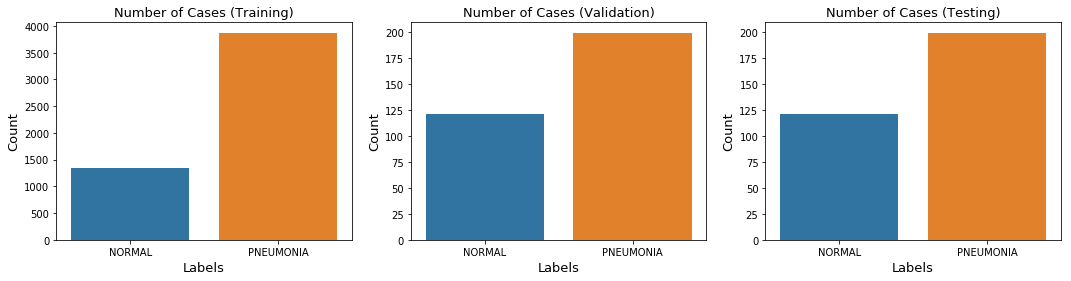

In [55]:
plot_property = reset_plot_propert(plot_property=None)

plot_property['figsize'] = (18,4)

plot_property['title_fontsize']=13
plot_property['label_fontsize']=13

plot_property['title'] = "Number of Cases"

plot_property['xlabel']="Labels"
plot_property['ylabel']="Count"

plot_property['subplot']=131

show_train_val_test(training_dir, validation_dir, testing_dir, plot_property)


## Preprocessing (Image Preprocessing)

#### Configuring Image Transformation Parameters for Training, Validation, Testing and  Dataset 

In [29]:


# Image normalization
#----------------------#
norm=255.0

# recscaling
#----------------------#
rescale=1./norm



#Image Augmentation/ Preprocessing before training
#--------------------------------------------------------------------------------------------------------------------#
# Image Data Generator
#--------------------------------------------------------------------------------------------------------------------#
# keras.preprocessing.image.ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
#--------------------------------------------------------------------------------------------------------------------#
# Available Parameters
#--------------------------------------------------------------------------------------------------------------------#
def reset_image_augmentation_params():
    image_transform_params = {
        'featurewise_center' : False, 
        'samplewise_center' : False, 
        'featurewise_std_normalization' : False, 
        'samplewise_std_normalization' : False, 
        'zca_whitening' : False, 
        'zca_epsilon' : 1e-06, 
        'rotation_range' : 0,
        'width_shift_range' : 0.0, 
        'height_shift_range' : 0.0, 
        'brightness_range' : None, 
        'shear_range' : 0.0, 
        'zoom_range' : 0.0, 
        'channel_shift_range' : 0.0, 
        'fill_mode' : 'nearest', 
        'cval' : 0.0, 
        'horizontal_flip' : False, 
        'vertical_flip' : False, 
        'rescale' : None, 
        'preprocessing_function' : None, 
        'data_format' : None, 
        'validation_split' : 0.0, 
        'dtype' : None
    }
    return image_transform_params


def reset_image_augmentation_params_pneumonia():
    if x==1:
        image_transform_params = reset_image_augmentation_params()
        image_transform_params['rescale'] = rescale
    
    else:
        image_transform_params = {
            'rescale' : rescale
        }
    return image_transform_params



 
    
    

#--------------------------------------------------------------------------------------------------------------------#
# Batch Generator
#--------------------------------------------------------------------------------------------------------------------#
# flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')
#--------------------------------------------------------------------------------------------------------------------#
# Available Parameters
#--------------------------------------------------------------------------------------------------------------------#
def reset_batch_params():
    batch_params = {
        'target_size' : (256, 256),
        'color_mode':'rgb',
        'classes' : None,
        'class_mode':'categorical',
        'batch_size' : 32,
        'shuffle':True,
        'seed':None,
        'save_to_dir':None, 
        'save_prefix':'',
        'save_format':'png', 
        'follow_links':False, 
        'subset':None, 
        'interpolation':'nearest'
    }
    
    return batch_params


def reset_batch_params_pneumonia(x=1):
    if x==1:
        batch_params = reset_batch_params()
        
        batch_params['target_size'] = (299, 299)
        batch_params['classes'] = ['Normal', 'Cancer']
        batch_params['class_mode']='categorical'
        batch_params['batch_size'] = 128
        
        
    else:
        batch_params = {
            'target_size' : (299, 299),
            'classes' : ['Normal', 'Cancer'],
            'class_mode':'categorical',
            'batch_size' : 128,
            'shuffle':True
        }

    
    return batch_params


batch_params = reset_batch_params_pneumonia()
image_transform_params = reset_image_augmentation_params_pneumonia()


2


### Image Transformation for Training, Validation, Testing and  Dataset 

In [68]:
train_generator = get_transformed_image_batch(training_dir, image_transform_params, batch_params)       

validation_generator = get_transformed_image_batch(validation_dir, image_transform_params, batch_params) 

batch_params['shuffle'] = False

test_generator = get_transformed_image_batch(testing_dir, image_transform_params, batch_params) 

# print(os.listdir(training_dir))
# print(len(os.listdir(training_dir+"/NORMAL")))
# print(len(os.listdir(training_dir+"/PNEUMONIA")))


Found 1341 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


#### Weight Adjustment for Class Label Imbalance

In [70]:
y=train_generator.classes
class_weight=get_class_weight(y)
# class_weight=None
# class_weight

##  Training Configuration
### Setting Output Directory (Model and Log) 

In [71]:
#--------------------------------------------------------------------------------------------------------------------#
# Model Directory
#--------------------------------------------------------------------------------------------------------------------#
model_dir=output_directory + r"models/"+time.strftime('%Y-%m-%d %H-%M-%S')+"/"
#--------------------------------------------------------------------------------------------------------------------#
# Log Directory
#--------------------------------------------------------------------------------------------------------------------#
log_dir=output_directory + r"logs/"+time.strftime('%Y-%m-%d %H-%M-%S')
#--------------------------------------------------------------------------------------------------------------------#



# Create Output Directory (Model and Log)
#--------------------------------------------------------------------------------------------------------------------#
create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)
#--------------------------------------------------------------------------------------------------------------------#


#--------------------------------------------------------------------------------------------------------------------#
# Model File Name Configuration
#------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Initial Trainning Model Filename 
#----------------------------------------------------------------------------------------------------#
init_model_file=model_dir+"base-"+"{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Trainning Model Filename 
#----------------------------------------------------------------------------------------------------#
model_file=model_dir+"{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Retrainning Model Filename 
#----------------------------------------------------------------------------------------------------#
retrain_model_file=model_dir+"retrain-{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"
#--------------------------------------------------------------------------------------------------------------------#

### Base Model Configuration

#### Base Model - InceptionV3 (pretrained) initial training settings


In [72]:
model_params={
    'include_top': False,
    'non_trainable_index':249,
    'print_layers': False
}
training_params = { 
    'epochs':15,
    'init_verbose': 0,
    'metrics': None,
    'optimizer' = optimizers.Adam(),
    'callbacks': None
}

### Model Trainning Parameters
##### Settings for Loss, Optimizer and Performance Metrics

In [73]:
#--------------------------------------------------------------------------------------------------------------------#
# Optimizer
#--------------------------------------------------------------------------------------------------------------------#
# Available Optimizers
#--------------------------------------------------------------------------------------------------------------------#
# SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
# RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
# Adagrad(lr=0.01, epsilon=None, decay=0.0)
# Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
# Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
# Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#--------------------------------------------------------------------------------------------------------------------#
# Format
#--------------------------------------------------------------------------------------------------------------------#
# keras.optimizers.X
#--------------------------------------------------------------------------------------------------------------------#


#--------------------------------------------------------------------------------------------------------------------#
# Selected Optimizer
#--------------------------------------------------------------------------------------------------------------------#
# learning rate = 1.0/0.1/0.01/0.001/0.0001/0.00001/0.000001
# Decay = decay=1e-5/ 1e-6
#--------------------------------------------------------------------------------------------------------------------#
init_optimizer=optimizers.Adam()
optimizer=optimizers.Adam()
ret_optimizer=optimizers.Adam()
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# loss Function
#--------------------------------------------------------------------------------------------------------------------#
# Available Loss Functions
#--------------------------------------------------------------------------------------------------------------------#
# 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
# 'squared_hinge', 'hinge', 'categorical_hinge', 'logcosh',
# 'categorical_crossentropy', 'sparse_categorical_crossentropy', 'binary_crossentropy',
# 'kullback_leibler_divergence', 'poisson', 'cosine_proximity'
#--------------------------------------------------------------------------------------------------------------------#
# Format
#--------------------------------------------------------------------------------------------------------------------#
# keras.loss.X ??
#--------------------------------------------------------------------------------------------------------------------#
# Selected Optimizers
#--------------------------------------------------------------------------------------------------------------------#
init_loss='categorical_crossentropy'
loss='categorical_crossentropy'
ret_loss='categorical_crossentropy'
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# Performance Metrics
#--------------------------------------------------------------------------------------------------------------------#
# Available Metrics
#--------------------------------------------------------------------------------------------------------------------#
# 'binary_accuracy', 'categorical_accuracy', 'sparse_categorical_accuracy', 
# 'top_k_categorical_accuracy', 'sparse_top_k_categorical_accuracy
# None
#--------------------------------------------------------------------------------------------------------------------#
# Format
#--------------------------------------------------------------------------------------------------------------------#
# keras.metrics.X
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Selected Optimizers
#--------------------------------------------------------------------------------------------------------------------#
init_metrics=['accuracy']
metrics=['accuracy']
ret_metrics=['accuracy']
#--------------------------------------------------------------------------------------------------------------------#


In [74]:
# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)

### Trainning Parameters (Epochs, Steps, Verbose)
#### Main model training parameter configuration

In [75]:
#--------------------------------------------------------------------------------------------------------------------#
# Epochs
#--------------------------------------------------------------------------------------------------------------------#
# Available
#--------------------------------------------------------------------------------------------------------------------#
# epochs = 10/20/30/50
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Selected Number of Epochs
#--------------------------------------------------------------------------------------------------------------------#
init_epochs = 10
epochs = 10
ret_epochs = 10
#--------------------------------------------------------------------------------------------------------------------#


#--------------------------------------------------------------------------------------------------------------------#
# Steps
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Trainning Steps
#--------------------------------------------------------------------------------------------------------------------#
# Available
# steps_per_epoch=60/600
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Selected Steps Per Epoch
#--------------------------------------------------------------------------------------------------------------------#
init_steps_per_epoch=len(train_generator)
steps_per_epoch=len(train_generator)
ret_steps_per_epoch=len(train_generator)
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Validation Steps
#--------------------------------------------------------------------------------------------------------------------#
# validation_steps=1/20/200
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Selected Validation Per Epoch
#--------------------------------------------------------------------------------------------------------------------#
init_validation_steps=len(validation_generator)
validation_steps=len(validation_generator)
ret_validation_steps=len(validation_generator)
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# Verbose
#--------------------------------------------------------------------------------------------------------------------#
# Available
#--------------------------------------------------------------------------------------------------------------------#
# 0=nothing 
# 1=each line
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Selected Verbose
#--------------------------------------------------------------------------------------------------------------------#
init_verbose=1
verbose=1
ret_verbose=1
#--------------------------------------------------------------------------------------------------------------------#

### Callbacks (Configuration and Function Call)
#### Important  - ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
#### Others - BaseLogger, TerminateOnNaN , ProgbarLogger,  History, LearningRateScheduler, CSVLogger

In [78]:
#--------------------------------------------------------------------------------------------------------------------#
# Base Logger
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.BaseLogger(stateful_metrics=None)
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
base_logger_stateful_metrics=None
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
base_logger = keras.callbacks.BaseLogger(stateful_metrics=base_logger_stateful_metrics)
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# TerminateOnNaN
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.TerminateOnNaN()
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
terminate_on_NaN = keras.callbacks.TerminateOnNaN()
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# Proggress Bar Logger
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.ProgbarLogger(count_mode='samples', stateful_metrics=None)
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
progbar_logger_count_mode='samples'
progbar_logger_stateful_metrics=None
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
progbar_logger = keras.callbacks.ProgbarLogger(
    count_mode=progbar_logger_count_mode, 
    stateful_metrics=progbar_logger_stateful_metrics)
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# History
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.History()
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
history = keras.callbacks.History()
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# Model Checkpoint
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.ModelCheckpoint()
# ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)#
#--------------------------------------------------------------------------------------------------------------------#
# Default Settings
#--------------------------------------------------------------------------------------------------------------------#
# monitor='val_loss'
# verbose=0
# save_best_only=False
# save_weights_only=False
# mode='auto'
# period=1
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
filepath = model_file
ck_monitor='val_loss'
ck_verbose=1
ck_save_best_only=False
ck_save_weights_only=False
ck_mode='auto'
ck_period=1
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
checkpoint = ModelCheckpoint(
    filepath=model_file,
    monitor=ck_monitor, 
    verbose=ck_verbose,
    save_best_only=ck_save_best_only, 
    save_weights_only=ck_save_weights_only, 
    mode=ck_mode, 
    period=ck_period)
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# Early Stopping
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
#--------------------------------------------------------------------------------------------------------------------#
# Default Settings
#--------------------------------------------------------------------------------------------------------------------#
# monitor='val_loss'
# min_delta=0
# patience=0
# verbose=0
# mode='auto'
# baseline=None
# restore_best_weights=False
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
es_monitor = 'val_loss'
es_min_delta=0
es_patience=5
es_verbose=1
es_mode='auto'
es_baseline=None
restore_best_weights=False
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
init_early_stopping = EarlyStopping(
    monitor=es_monitor, 
    min_delta=es_min_delta, 
    patience=es_patience, 
    verbose=es_verbose, 
    mode=es_mode, 
    baseline=es_baseline)

early_stopping = EarlyStopping(
    monitor=es_monitor, 
    min_delta=es_min_delta, 
    patience=es_patience, 
    verbose=es_verbose, 
    mode=es_mode, 
    baseline=es_baseline)

ret_early_stopping = EarlyStopping(
    monitor=es_monitor, 
    min_delta=es_min_delta, 
    patience=es_patience, 
    verbose=es_verbose, 
    mode=es_mode, 
    baseline=es_baseline)
#--------------------------------------------------------------------------------------------------------------------#




#--------------------------------------------------------------------------------------------------------------------#
# Learning Rate Scheduler
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.LearningRateScheduler(schedule, verbose=0)
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
lr_schedule = None
lr_scheduler_verbose=0
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
# learning_rate_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule, lr_scheduler_verbose=0)
#--------------------------------------------------------------------------------------------------------------------#



#--------------------------------------------------------------------------------------------------------------------#
# Tensorboard
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
#--------------------------------------------------------------------------------------------------------------------#
# Default Settings
#--------------------------------------------------------------------------------------------------------------------#
# log_dir='./logs' 
# histogram_freq=0 
# batch_size=32
# write_graph=True
# write_grads=False
# write_images=False 
# embeddings_freq=0
# embeddings_layer_names=None
# embeddings_metadata=None
# embeddings_data=None
# update_freq='epoch'
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
tb_log_dir=log_dir
tb_histogram_freq=0
tb_batch_size=batch_params['batch_size']
tb_write_graph=True
tb_write_grads=False
tb_write_images=False
tb_embeddings_freq=0
tb_embeddings_layer_names=None
tb_embeddings_metadata=None
tb_embeddings_data=None
update_freq='epoch'
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
tensorboard = TensorBoard(
    log_dir=tb_log_dir, 
    histogram_freq=tb_histogram_freq, 
    batch_size=tb_batch_size,
    write_graph=tb_write_graph, 
    write_grads=tb_write_grads, 
    write_images=tb_write_images,
    embeddings_freq=tb_embeddings_freq,
    embeddings_layer_names=tb_embeddings_layer_names, 
    embeddings_metadata=tb_embeddings_metadata, 
    embeddings_data=tb_embeddings_data)
#--------------------------------------------------------------------------------------------------------------------#




#--------------------------------------------------------------------------------------------------------------------#
# CSV Logger
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.CSVLogger(filename, separator=',', append=False)
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
CSV_logger_filename = log_dir+ "\\csv_logger.csv"
CSV_logger_separator=','
CSV_logger_append=False
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
CSV_logger = keras.callbacks.CSVLogger(
    CSV_logger_filename, 
    separator=CSV_logger_separator,
    append=CSV_logger_append)
#--------------------------------------------------------------------------------------------------------------------#




#--------------------------------------------------------------------------------------------------------------------#
# Reduce Learning Rate On Plateau
#--------------------------------------------------------------------------------------------------------------------#
# keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
#--------------------------------------------------------------------------------------------------------------------#
# Default Settings
#--------------------------------------------------------------------------------------------------------------------#
# monitor='val_loss'
# factor=0.1
# patience=10
# verbose=0
# mode='auto'
# min_delta=0.0001
# cooldown=0
# min_lr=0
#--------------------------------------------------------------------------------------------------------------------#
# Selected Settings
#--------------------------------------------------------------------------------------------------------------------#
red_lr_monitor='val_loss'
red_lr_factor=0.1 # default
# red_lr_factor=0.5
# red_lr_patience=5
red_lr_patience=2
red_lr_verbose=1
red_lr_mode='auto'
red_lr_min_delta=0.0001
red_lr_cooldown=0
red_lr_min_lr=0.0
#--------------------------------------------------------------------------------------------------------------------#
# Call Function
#--------------------------------------------------------------------------------------------------------------------#
reduce_lr = ReduceLROnPlateau(
    monitor=red_lr_monitor, 
    factor=red_lr_factor, 
    patience=red_lr_patience,
    verbose=red_lr_verbose, 
    mode=red_lr_mode, 
    min_delta=red_lr_min_delta,
    cooldown=red_lr_cooldown,
    min_lr=red_lr_min_lr)

ret_reduce_lr = ReduceLROnPlateau(
    monitor=red_lr_monitor, 
    factor=red_lr_factor, 
    patience=red_lr_patience,
    verbose=red_lr_verbose, 
    mode=red_lr_mode, 
    min_delta=red_lr_min_delta,
    cooldown=red_lr_cooldown,
    min_lr=red_lr_min_lr)
#--------------------------------------------------------------------------------------------------------------------#



### Callbacks Selected

In [79]:
#--------------------------------------------------------------------------------------------------------------------#
# Available Callbacks
#--------------------------------------------------------------------------------------------------------------------#
# base_logger 
# terminate_on_NaN 
# progbar_logger 
# history 
# checkpoint 
# early_stopping
# tensorboard 
# CSV_logger 
# reduce_lr
#--------------------------------------------------------------------------------------------------------------------#
# Format
#--------------------------------------------------------------------------------------------------------------------#
# callbacks = None
# callbacks = [checkpoint, tensorboard]
# callbacks = [checkpoint, reduce_lr, tensorboard]
# callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]
# callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard, history]
#--------------------------------------------------------------------------------------------------------------------#


#--------------------------------------------------------------------------------------------------------------------#
# Initial Model
#--------------------------------------------------------------------------------------------------------------------#
init_callbacks = None
#--------------------------------------------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------------------------------------------#
# Main Model
#--------------------------------------------------------------------------------------------------------------------#
callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]
#--------------------------------------------------------------------------------------------------------------------#


#--------------------------------------------------------------------------------------------------------------------#
# Retrain Model
#--------------------------------------------------------------------------------------------------------------------#
retrain_callbacks = [checkpoint, ret_reduce_lr, ret_early_stopping, tensorboard]
#--------------------------------------------------------------------------------------------------------------------#


## Training Base Model

In [80]:
# get inception model
date_time(1)

model = get_inception_model(train_generator, validation_generator, model_obj, training_obj, callbacks)

main_model = model

date_time(1)

Timestamp: 2018-12-06 02:05:20


TypeError: get_inception_model() takes 5 positional arguments but 13 were given

### Base model Performance with Minimum Pre-Training

In [ ]:
# print_report=True

# y_preds, y_classes, CM, CM_report, cls_report_print = predict_report(model, test_generator, classes, print_report)

# accuracy, loss =  model_evaluate(model, test_generator, print_report)
# print(accuracy, loss)
# res=show_confusion_matrix(test_generator, y_classes, classes)

In [ ]:
# model = build_model()

## Training Base Model for Fine-Tuning with New Class Labels
#### Fine-Tuning InceptionV3 


In [36]:
date_time(1)
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    class_weight=class_weight)

date_time(1)


Timestamp: 2018-12-05 02:01:45
Epoch 1/10
1032/1032 [==============================] - 7189s 7s/step - loss: 0.2989 - acc: 0.9014 - val_loss: 2.2894 - val_acc: 0.6004

Epoch 00001: saving model to data/output/models/2018-12-05 01-57-41/01-val_acc-0.60-val_loss-2.29.hdf5
Epoch 2/10
1032/1032 [==============================] - 7588s 7s/step - loss: 0.2356 - acc: 0.9236 - val_loss: 1.5974 - val_acc: 0.6352

Epoch 00002: saving model to data/output/models/2018-12-05 01-57-41/02-val_acc-0.64-val_loss-1.60.hdf5
Epoch 3/10
1032/1032 [==============================] - 6359s 6s/step - loss: 0.2137 - acc: 0.9316 - val_loss: 2.1584 - val_acc: 0.6165

Epoch 00003: saving model to data/output/models/2018-12-05 01-57-41/03-val_acc-0.62-val_loss-2.16.hdf5
Epoch 4/10
1032/1032 [==============================] - 5512s 5s/step - loss: 0.2004 - acc: 0.9365 - val_loss: 1.5278 - val_acc: 0.6202

Epoch 00004: saving model to data/output/models/2018-12-05 01-57-41/04-val_acc-0.62-val_loss-1.53.hdf5
Epoch 5/1

### Model Performance Visualization over the Epochs

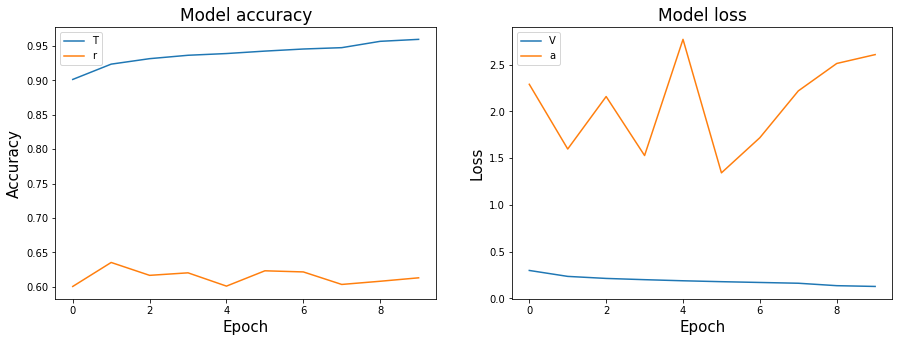

In [50]:
plot_val=[['acc', 'val_acc'], ['loss', 'val_loss']]


plot_property =  {
    'figsize':(15, 5),
    'title':['Model accuracy', 'Model loss'],
    'xlabel':['Epoch', 'Epoch'],
    'ylabel':['Accuracy', 'Loss'],
    'legend': ['Train', 'Val'],
    'title_fontsize' : 17,
    'label_fontsize':15, 
    'subplot':[121, 122]}


plot_history(history, plot_val, plot_property)

In [51]:
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

# y_preds, y_classes, CM, CM_report, cls_report_print = predict_report(model, test_generator, classes, print_report)

# accuracy, loss =  model_evaluate(model, test_generator, print_report)
# print(accuracy, loss)
# res=show_confusion_matrix(test_generator, y_classes, classes)

344/344 [==============================] - 498s 1s/step


In [52]:
print(result[0])
print(result[1]*100, "%")

2.6067435538439625
61.29303488835951 %


In [53]:
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)

344/344 [==============================] - 838s 2s/step


In [55]:
y_classes=y_pred.argmax(axis=-1)

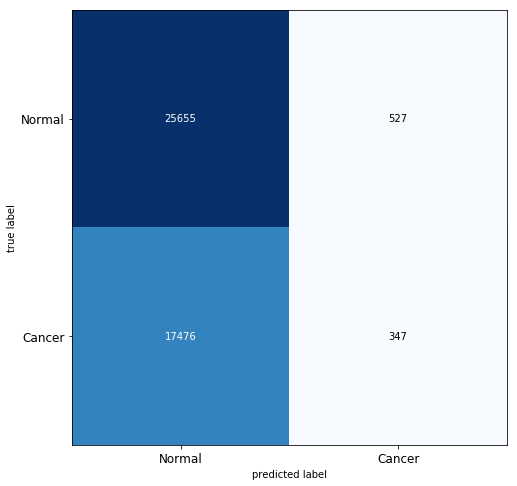

In [56]:
CM = confusion_matrix(test_generator.classes, y_classes)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

In [ ]:
# model = build_model()

## Test Performance of All Models on Test Dataset

In [57]:
date_time(1)

details = True
class_name = "Cancer"

report_type = "full"
results1, results2, report = test_all_models(model_dir, details, report_type, classes, class_name=class_name)

date_time(1)

Timestamp: 2018-12-05 21:54:42


ResourceExhaustedError: OOM when allocating tensor with shape[128,64,147,147] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2d_3/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@batch_normalization_3/cond/FusedBatchNorm/Switch"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](activation_2/Relu, conv2d_3/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node metrics/acc/Mean/_4021}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3245_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


### Visualization of  Performance Over All Epochs/Models based on Accuracy and Loss

In [ ]:
model_filename_list=[]
model_file_path_list=[]
for model_filename in results2:
    model_filename_list.append(model_filename)
    model_file_path_list.append(model_dir+model_filename)

In [ ]:
metric_array_names = ['Normal-precision', 'Normal-recall', 'Normal-f1-score', 
                     'Cancer-precision','Cancer-recall', 'Cancer-f1-score', 
                     'micro avg-precision', 'micro avg-recall', 'micro avg-f1-score', 
                     'macro avg-precision', 'macro avg-recall', 'macro avg-f1-score', 
                     'weighted avg-precision', 'weighted avg-recall', 'weighted avg-f1-score',
                     'Accuracy', 'Loss']
metric_array_list=[]


# 0
negative_precision_list = [results2[i][1]['Normal']['precision'] for i in results2]
metric_array_list.append(negative_precision_list)

# 1
negative_recall_list = [results2[i][1]['Normal']['recall'] for i in results2]
metric_array_list.append(negative_recall_list)

# 2
negative_f1_score_list = [results2[i][1]['Normal']['f1-score'] for i in results2]
metric_array_list.append(negative_f1_score_list)


# 3
positive_precision_list = [results2[i][1]['Cancer']['precision'] for i in results2]
metric_array_list.append(positive_precision_list)

# 4
positive_recall_list = [results2[i][1]['Cancer']['recall'] for i in results2]
metric_array_list.append(positive_recall_list)

# 5
positive_f1_score_list = [results2[i][1]['Cancer']['f1-score'] for i in results2]
metric_array_list.append(positive_f1_score_list)



# 6
micro_precision_list = [results2[i][1]['micro avg']['precision'] for i in results2]
metric_array_list.append(micro_precision_list)

# 7
micro_recall_list = [results2[i][1]['micro avg']['recall'] for i in results2]
metric_array_list.append(micro_recall_list)

# 8
micro_f1_score_list = [results2[i][1]['micro avg']['f1-score'] for i in results2]
metric_array_list.append(micro_f1_score_list)



# 9
macro_precision_list = [results2[i][1]['macro avg']['precision'] for i in results2]
metric_array_list.append(macro_precision_list)

# 10
macro_recall_list = [results2[i][1]['macro avg']['recall'] for i in results2]
metric_array_list.append(macro_recall_list)

# 11
macro_f1_score_list = [results2[i][1]['macro avg']['f1-score'] for i in results2]
metric_array_list.append(macro_f1_score_list)



# 12
weighted_precision_list = [results2[i][1]['weighted avg']['precision'] for i in results2]
metric_array_list.append(negative_f1_score_list)

# 13
weighted_recall_list = [results2[i][1]['weighted avg']['recall'] for i in results2]
metric_array_list.append(negative_f1_score_list)

# 14
weighted_f1_score_list = [results2[i][1]['weighted avg']['f1-score'] for i in results2]
metric_array_list.append(negative_f1_score_list)



# 15
accuracy_list = [results1[i][0] for i in results1]
metric_array_list.append(accuracy_list)

# 16
loss_list = [results1[i][1]for i in results1]
metric_array_list.append(loss_list)


In [ ]:
metric_array_list_percent = metric_array_list
num_metrics = len(metric_array_list)
for i in range(num_metrics):
    if i!=16:
        metric_array_list_percent[i] = [i*100 for i in metric_array_list[i]]

In [ ]:
# metric_array_list_norm = metric_array_list
# for i in range(len(metric_array_list)):
#     m=max(metric_array_list[i])
#     metric_array_list_norm[i] = [i/m for i in metric_array_list_norm[i]]

In [ ]:
skip_index = [1,2,7,8,10,11]
plot_index = [2, 3,4,5, 12, 13, 14, 15]

# plot_index = [2, 3,4,5, 12, 13, 14, 15]

In [ ]:
figsize_col = 12
figsize_row = 4

facecolor='w'
edgecolor='k'

titlesize = 'Large'

In [ ]:
seperate_plot = False
# seperate_plot = True

filter_skip = False

filter_plot = False
filter_plot = True

dpi=150


length=len(metric_array_list)
num_epochs=len(results2)
x = np.arange(num_epochs)

fig, axs = plt.subplots(figsize=(18, 12), dpi=dpi, facecolor=facecolor, edgecolor=edgecolor)
plt.rcParams.update({'axes.titlesize': titlesize})
for i in range(length):
    if not filter_plot or i in plot_index:
        if seperate_plot:  
            fig, axs = plt.subplots(figsize=(figsize_col, figsize_row), dpi=dpi, facecolor=facecolor, edgecolor=edgecolor)
            plt.rcParams.update({'axes.titlesize': titlesize})
            
            plt.plot(x, metric_array_list_percent[i], label=metric_array_names[i])
            plt.title(metric_array_names[i])
            plt.xlabel("Epoch")
            plt.ylabel("Score (100%)")
#             plt.yticks(np.arange(0, 100, 5))
#             plt.xticks(np.arange(0, num_epochs, 1))
            plt.legend()
            plt.grid(True)

#             plt.ylim([min(metric_array_list_percent[i]),max(metric_array_list_percent[i])])
            plt.show()
        else:
            plt.plot(x, metric_array_list_percent[i], label=metric_array_names[i])
            plt.title(metric_array_names[i])
        

            
if not seperate_plot:
    plt.xlabel("Epoch")
    plt.ylabel("Val")
#     plt.yticks(np.arange(0, 100, 5))
#     plt.xticks(np.arange(0, num_epochs, 1))
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
figsize_col=10
figsize_row=3
fig, axs = plt.subplots(figsize=(figsize_col, figsize_row), dpi=dpi, facecolor=facecolor, edgecolor=edgecolor)
plt.rcParams.update({'axes.titlesize': titlesize})


x = np.arange(len(results1))


plt.subplot(121)
plt.plot(x, accuracy_list, label="Accuarcy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Score(100%)")
plt.legend()

plt.subplot(122)
plt.plot(x, loss_list, label= "Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
nums = [3,13,17, 18]
num_model = 0

In [ ]:
for i in range(len(metric_array_list_percent)):
    print("%6s%10s%.2f"%(metric_array_names[i],":", metric_array_list_percent[i][num_model]))

In [ ]:
# model_dir="data\\output\\models\\20181201035451\\"
# model=keras.models.load_model(model_dir+"30-val_acc-0.85-val_loss-0.66.hdf5")

model_path = model_file_path_list[num_model]

model = keras.models.load_model(model_path)

accuracy, loss =  model_evaluate(model, test_generator, print_report=True)
y_preds, y_classes, CM, cls_report, cls_report_print = predict_report(model, test_generator, classes, print_report=True)

In [ ]:
classes = ['Normal', 'PNEUMONIA']
CM = confusion_matrix(test_generator.classes, y_classes)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.show()

# Retraining Best Model

In [ ]:
# reset_callbacks(checkpoint, reduce_lr, early_stopping, tensorboard)
# reset_graph(model)

### Callbacks Configuration

### Callbacks

In [ ]:
base_logger = keras.callbacks.BaseLogger(stateful_metrics=base_logger_stateful_metrics)
terminate_on_NaN = keras.callbacks.TerminateOnNaN()
progbar_logger = keras.callbacks.ProgbarLogger(count_mode=progbar_logger_count_mode, stateful_metrics=progbar_logger_stateful_metrics)
history = keras.callbacks.History()
# learning_rate_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule, lr_scheduler_verbose=0)
CSV_logger = keras.callbacks.CSVLogger(CSV_logger_filename, separator=CSV_logger_separator, append=CSV_logger_append)

## Retraining Best Model
### Selecting best model file based on validation accuracy mentioned in file names

In [ ]:
# selecting best model file / checkpoint for retraining
# model_path = model_dir+r"12-val_acc-0.70-val_loss-1.09.hdf5"
# model_path = model_dir+r"20-val_acc-0.66-val_loss-1.97.hdf5"

# best accuracy/ F-1 score
# model_path = "data/output/models/"+"17-val_acc-0.82-val_loss-0.42.hdf5"

# Lowest validation Loss
# model_path = "data/output/models/"+"12-val_acc-0.70-val_loss-1.09.hdf5"

# Best Recall
# model_path = "data/output/models/"+"20-val_acc-0.66-val_loss-1.97.hdf5"

model_path = model_dir+r"20-val_acc-0.71-val_loss-1.26.hdf5"

model = keras.models.load_model(model_path)

# train inception model
# fine-tuning the top layers
# compile model with loss, optimizer and metrics 
model.compile(optimizer, loss=loss, metrics=metrics)
tensorboard.set_model(model) 

# retrain by loading last good model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    # verbose=1,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    class_weight=class_weight,
    initial_epoch=initial_epoch)
 

In [ ]:
def extract_id(x):
    
    # split into a list
    a = x.split('/')
    # split into a list
    b = a[1].split('.')
    extracted_id = b[0]
    
    return extracted_id



test_filenames = test_generator.filenames
df_preds = pd.DataFrame(predictions, columns=classes)
df_preds['file_names'] = test_filenames
df_preds['id'] = df_preds['file_names'].apply(extract_id)
df_preds.head()

# Get the true labels
y_true = test_generator.classes

# Get the predicted labels as probabilities
y_pred = df_preds['Cancer']

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

roc_auc_score(y_true, y_pred)


In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
submission = pd.DataFrame({'id':image_id, 
                           'label':y_pred, 
                          }).set_index('id')

submission.to_csv('patch_preds.csv', columns=['label']) 
submission.head()

##### Retriving actual labels 

In [ ]:
label_map = (test_generator.class_indices)
label_map_rev = {v: name_correct(k) for k,v in label_map.items()}
num_batch_t = len(test_generator)
print(label_map)
print(label_map_rev)

##### Showing accuracy for Model over Single Batch of Test Dataset

In [ ]:
num = random.randint(0, num_batch_t-1)
y_img_batch, y_class_batch = test_generator[num] 
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print("Selected Batch No: %d\nBatch Size: %d"%(num, len(y_pred)))
print("Accuracy : ", sum(y_pred==y_true)/batch_size*100, "%")

y_true_labels = [label_map_rev[c] for c in y_true]
y_pred_labels = [label_map_rev[c] for c in y_pred]
batch_size_t = len(y_true_labels)

### Visualization 
Visualization of performance of a random test dataset batch and few random images from a batch

#### Visualization 1 (Random Batch)
Visualization of performance of a random test dataset batch

Setting parameters for visualization 1

In [ ]:
figure_directory = "data/output/figures"
image_file_name = figure_directory+"/result"

dpi=100

update_image = True


cols = 8
rows= batch_size_t/cols
if batch_size_t%cols==0:
    rows = int(batch_size_t/cols)
else:
    rows = int(batch_size_t/cols)+1
    
figsize_col = cols*2.5
figsize_row = rows*2.5

hspace = 0.5
wspace = 0.3

facecolor='w'
edgecolor='k'

titlesize = 'small'

true_prediction_label_color='black'
false_prediction_label_color='red'

true_label_title_prefix = "org : "
pred_label_title_prefix = "pred: "

if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)

#### Visualization 1 (Random Batch)
Visualization of performance of a random test dataset batch

In [ ]:
# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize_col, figsize_row),
                        dpi=dpi, facecolor=facecolor, edgecolor=edgecolor,
                        subplot_kw={'xticks': [], 'yticks': []})


plt.rcParams.update({'axes.titlesize': titlesize})
plt.subplots_adjust(hspace=hspace, wspace=wspace)

for i in range(0, batch_size_t): # how many imgs will show from the mxn grid
    plt.subplot(rows, cols, i+1)
    
    plt.imshow(y_img_batch[i])
    
    plt.xticks([])
    plt.yticks([])
    
    if y_true_labels[i]==y_pred_labels[i]:
        plt.title(true_label_title_prefix + y_true_labels[i] + "\n" + pred_label_title_prefix + y_pred_labels[i])
    else:
        plt.title(true_label_title_prefix + y_true_labels[i] + "\n" + pred_label_title_prefix + y_pred_labels[i], color=false_prediction_label_color)
        
    if update_image and os.path.exists(image_file_name):
        os.remove(image_file_name)
    
    fig.savefig(image_file_name, dpi=dpi)

plt.tight_layout()
plt.show()

#### Visualization 2 (Random) 
Visualization of performance of a few random images from a random batch

Setting parameters for visualization 2

In [ ]:
figure_directory = "data/output/figures"
image_file_name = figure_directory+"/sample"

dpi=100

update_image = True

cols = 4
rows= 2

count = rows*cols
    
figsize_col = cols*2.5
figsize_row = rows*2.5

hspace = 0.5
wspace = 0.3

# titlesize = 'small'

true_prediction_label_color='black'
false_prediction_label_color='red'

true_label_title_prefix = "org:  "
pred_label_title_prefix = "pred: "

#### Visualization 2 (Random) 
Visualization of performance of a few random images from a random batch

In [ ]:
# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(figsize_col, figsize_row),
                        dpi=dpi, facecolor=facecolor, edgecolor=edgecolor,
                        subplot_kw={'xticks': [], 'yticks': []})

plt.rcParams.update({'axes.titlesize': titlesize})
plt.subplots_adjust(hspace=hspace, wspace=wspace)


batch_size_tmp = batch_size_t

m = {}

for i in range(0, count): 
    num = random.randint(0, batch_size_tmp-1)
    while num in m:
        num = random.randint(0, batch_size_tmp-1)
    
    m[num]=1
    
    plt.subplot(rows, cols, i+1)
    
    plt.imshow(y_img_batch[num])
    
    plt.xticks([])
    plt.yticks([])
    
    if y_true_labels[num]==y_pred_labels[num]:
        plt.title(true_label_title_prefix + y_true_labels[num] + "\n" + pred_label_title_prefix + y_pred_labels[num])
    else:
        plt.title(true_label_title_prefix + y_true_labels[num] + "\n" + pred_label_title_prefix + y_pred_labels[num], color=false_prediction_label_color)
    
   
    if update_image and os.path.exists(image_file_name):
        os.remove(image_file_name)   
    
    fig.savefig(image_file_name, dpi=dpi)


plt.tight_layout()
plt.show()